<a href="https://colab.research.google.com/github/Avelez164/Data-Science-Big-Data/blob/main/Copy_of_eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CPSC 375 Classwork - Exploratory data analysis

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/ProfAvery/cpsc375-classwork/blob/main/eda.ipynb)

- *Manager*:
- *Recorder*:
- *Presenter*:
- *Timekeeper*:

In [ ]:
%pip install lets-plot

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 43.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 332.3/332.3 kB 21.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.1/58.1 kB 4.7 MB/s eta 0:00:00


In [ ]:
import seaborn as sns
from lets_plot import *

LetsPlot.setup_html()

## Part 1 - Slide 15

In [ ]:
import statsmodels.api as sm

iris_dataset = sm.datasets.get_rdataset("iris")
iris = iris_dataset.data

Consider the data *iris*

1. Create a histogram of Sepal.Width


In [ ]:
(
    ggplot(iris)
    + geom_histogram(aes(x="Sepal.Width"))
    + facet_wrap('Species')
)

2. Try different numbers of bins

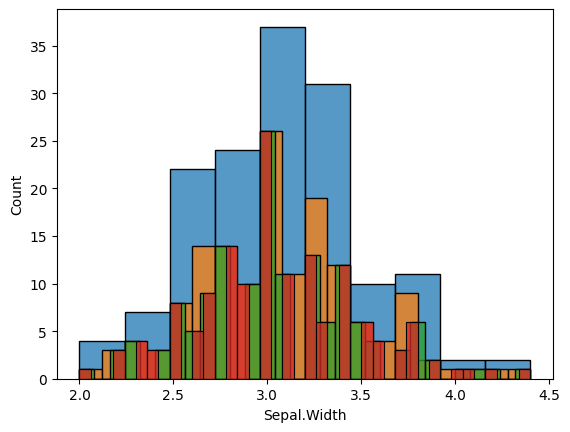

In [ ]:
for nbin in range(10, 41, 10):
  ggplot(iris) + geom_histogram(aes(x="Sepal.Width"), bins=nbin)
  sns.histplot(iris, x="Sepal.Width", bins=nbin)

In [ ]:
(
    ggplot(iris)
    + geom_histogram(aes(x="Sepal.Width"), bins=30)
)

## Part 2 - Slide 28

In [ ]:
import numpy as np
import statistics
nums = np.array(sorted([36, 42, 100, 28, 17, 12, 9, 4, 1]))


q1, median, q3 = statistics.quantiles(nums)
iqr = q3 - q1
lower_fence = q1 - (1.5 * iqr)
upper_fence = q3 + (1.5 * iqr)
outliers = nums[(nums < lower_fence) | (nums > upper_fence)]
inside_fences = nums[(nums >= lower_fence) & (nums <= upper_fence)]
lower_whisker = inside_fences[0]
upper_whisker = inside_fences[-1]

print(nums)
lower_fence, lower_whisker, q1, median, q3 , upper_whisker, upper_fence, outliers


[  1   4   9  12  17  28  36  42 100]


(-42.25, 1, 6.5, 17.0, 39.0, 42, 87.75, array([100]))

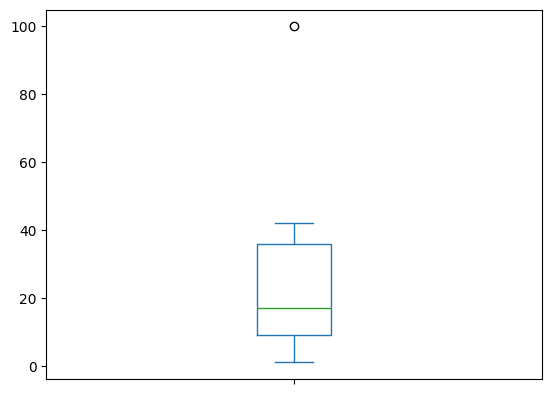

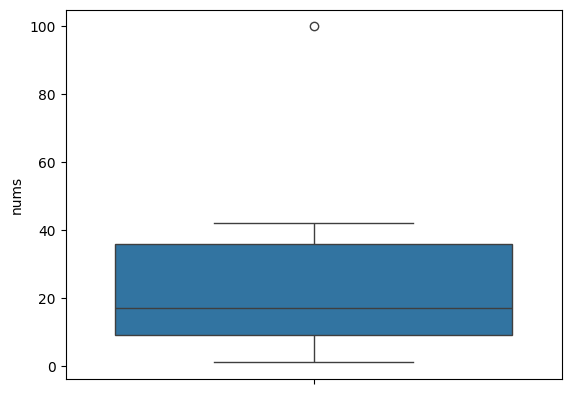

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
s = pd.Series(nums)

df = pd.DataFrame(dict(nums=nums))

s.plot.box()
plt.show()

sns.boxplot(df, y='nums')

(
    ggplot(df)
    + geom_boxplot(aes(y='nums'))
)

* Construct a boxplot of the *Ozone* column of the *airquality* dataset

In [ ]:
airquality_dataset = sm.datasets.get_rdataset("airquality")
airquality = airquality_dataset.data



Verify that the outliers match what you get using the IQR "rule-of-thumb"

*Hint*: use `scipy.stats.iqr` and/or `df.quantile` functions

In [ ]:
import scipy
scipy.stats.iqr(airquality.Ozone, nan_policy='omit')

airquality.Ozone.quantile([0.25, 0.75])

18 - (1.5*iqr), 63.25 + (1.5*iqr)

(-13.5, 94.75)

* Construct a boxplot of these 9 values
  
  8,11,17,36,25,24,1,20,64

[ 1  8 11 17 20 24 25 36 64]


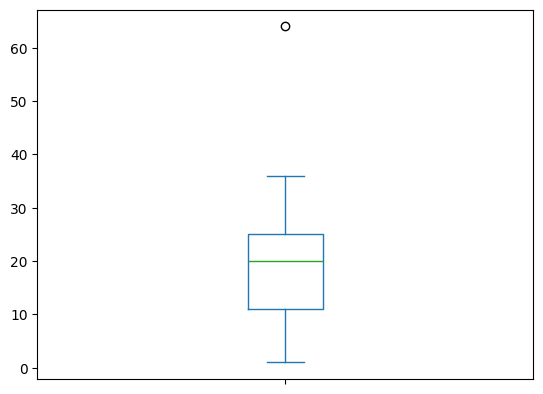

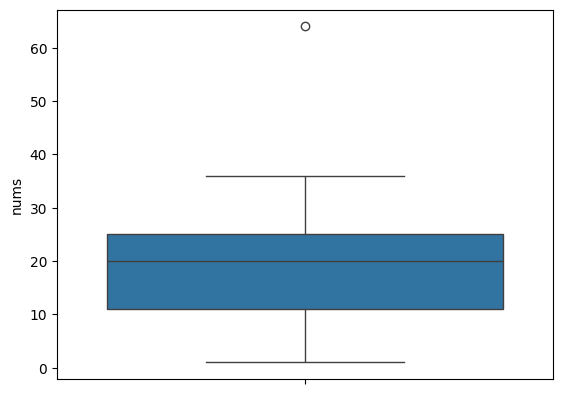

In [ ]:
import numpy as np
import statistics
nums = np.array(sorted([8,11,17,36,25,24,1,20,64]))


q1, median, q3 = statistics.quantiles(nums)
iqr = q3 - q1
lower_fence = q1 - (1.5 * iqr)
upper_fence = q3 + (1.5 * iqr)
outliers = nums[(nums < lower_fence) | (nums > upper_fence)]
inside_fences = nums[(nums >= lower_fence) & (nums <= upper_fence)]
lower_whisker = inside_fences[0]
upper_whisker = inside_fences[-1]

print(nums)
lower_fence, lower_whisker, q1, median, q3 , upper_whisker, upper_fence, outliers

import matplotlib.pyplot as plt
import pandas as pd
s = pd.Series(nums)

df = pd.DataFrame(dict(nums=nums))

s.plot.box()
plt.show()

sns.boxplot(df, y='nums')

(
    ggplot(df)
    + geom_boxplot(aes(y='nums'))
)

## Part 3 - Slide 30

Explore the *airquality* dataset

 * How many variables, size of the data, …
    - Is this Big Data?
   

In [ ]:
airquality.shape

(153, 6)

 * Summary statistics


In [ ]:
airquality.describe().T

,count,mean,std,min,25%,50%,75%,max
Ozone,116.0,42.129310,32.987885,1.0,18.00,31.5,63.25,168.0
Solar.R,146.0,185.931507,90.058422,7.0,115.75,205.0,258.75,334.0
Wind,153.0,9.957516,3.523001,1.7,7.40,9.7,11.50,20.7
Temp,153.0,77.882353,9.465270,56.0,72.00,79.0,85.00,97.0
Month,153.0,6.993464,1.416522,5.0,6.00,7.0,8.00,9.0
Day,153.0,15.803922,8.864520,1.0,8.00,16.0,23.00,31.0


 * Is there missing data? Which variables are most affected?


In [ ]:
airquality.isna().sum()

,0
Ozone,37
Solar.R,7
Wind,0
Temp,0
Month,0
Day,0


 * Visualize each variable individually
   - Are there outliers?
  

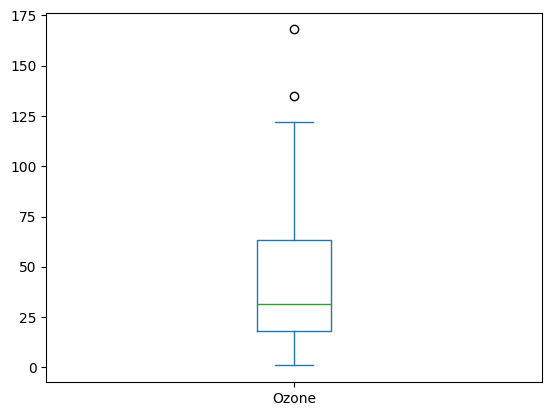

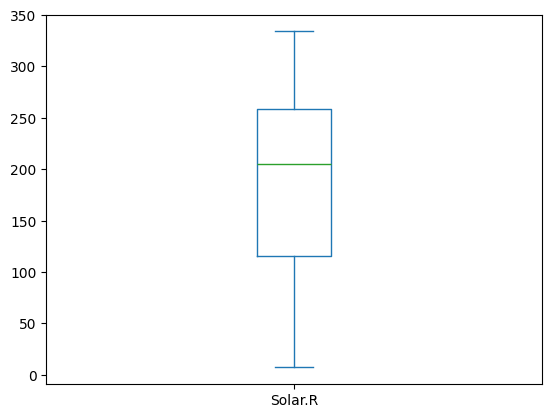

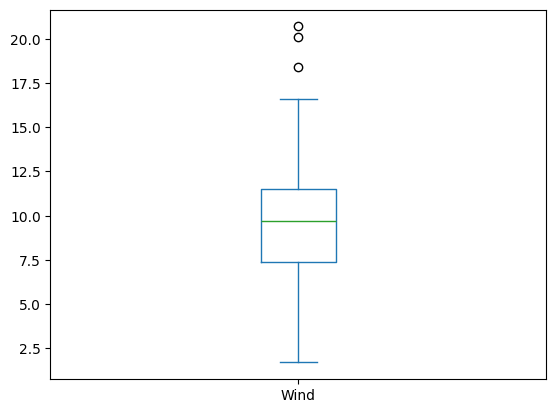

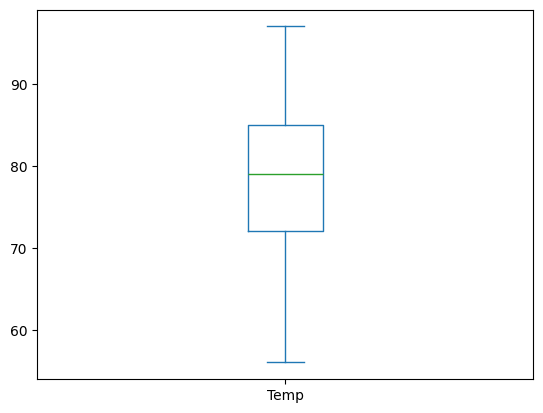

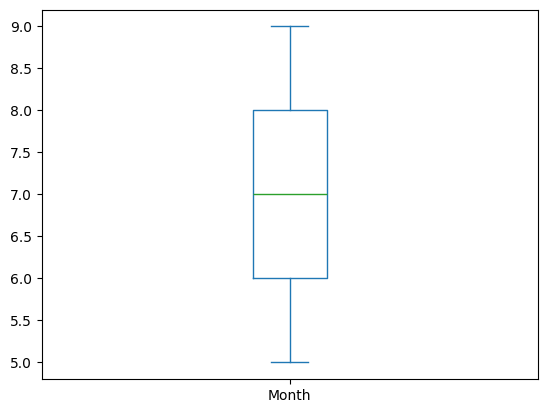

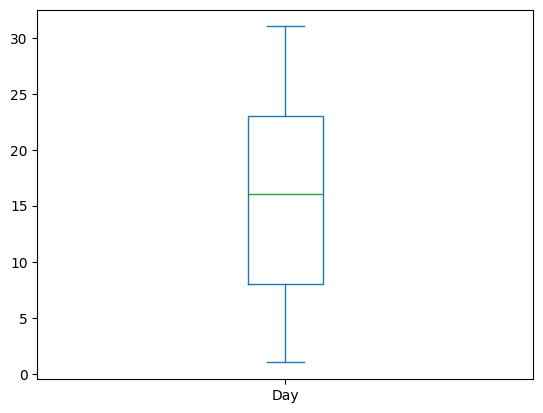

In [ ]:
for col in airquality.columns:
  airquality[col].plot.box()
  plt.show()

 * Should any variable(s) be converted to a categorical?
   - Which ones?


In [ ]:
variables = airquality.columns
variables


Index(['Ozone', 'Solar.R', 'Wind', 'Temp', 'Month', 'Day'], dtype='object')

## Part 4 - Slide 40

 Explore the *airquality* dataset

 * Should any variable(s) be converted to a categorical?
   - Convert these to a categorical
   

 * Visualize any 5 pairs of variables of the airquality dataset
   - Choose the appropriate plot for each pair
   